In [1]:
import os
import charts_function_list, math_functions

In [2]:
base_path, data_folder,outputs = charts_function_list.folder_setup()

### Get the Data

In [3]:
os.chdir(data_folder)
population = pd.read_csv('census_city_population.csv')

In [132]:
population['City_Pop_Mil']=(population['2015 City Population']/1000000).round(decimals=2)
population['Metro_Pop_Mil']=(population['Metro Population']/1000000).round(decimals=2)
population['Metro_Percent_Diff']=((population['Metro_Pop_Mil']-population['City_Pop_Mil'])/population['City_Pop_Mil'])*100
population['Ratio']=(population['Metro_Pop_Mil']/population['City_Pop_Mil']).round(decimals=1)


In [139]:
population = population.sort_values(by='2015 City Population',ascending=False).reset_index(drop=True)
population_25 = population[0:25]
population_25_metro_diff = population_25.sort_values(by='Metro_Percent_Diff',ascending=False).reset_index(drop=True)


In [136]:
plt.rcParams["font.family"] = "Futura Bk BT"

def population_bubbles(df):

    fig = plt.figure(figsize=(35,25))
    fig.suptitle('Top 25 Most Populated US Cities vs Their Metro Statistical Areas',size=44,fontname='Franklin Gothic Medium',alpha=.9)
    plt.subplots_adjust(top=0.9)

    color1 ='#36B86A'
    color2 ='#C8C8C8'

    for item in range(25):
        ax = fig.add_subplot(5,5,item+1)
        ax.set_title(df.ix[item]['Geography'],ha='center',size=34,alpha=1,color='#4A3E3D',position=(.5,1.1))
        plt.scatter(0,0,s=df.ix[item]['2015 City Population']/400,zorder=2,color=color1,clip_on=False,alpha=1)
        plt.scatter(0,0,s=df.ix[item]['Metro Population']/400,zorder=1,color=color2,clip_on=False,alpha=1)
        ax.set_ylim(-.5,.5)
        ax.set_xlim(-.5,.5)
        ax.text(0,.8,str(df['City_Pop_Mil'][item])+'M'+'\nppl',transform=ax.transAxes,size=20,ha='right',va='center',
                fontname='Franklin Gothic Medium',color=color1,style='italic')
        ax.text(0,.5,str(df['Metro_Pop_Mil'][item])+'M'+'\nppl',transform=ax.transAxes,size=20,ha='right',va='center',
                fontname='Franklin Gothic Medium',color='black',alpha=.6,style='italic')
        
        ax.text(0,.2,str(df['Ratio'][item])+' to 1',transform=ax.transAxes,size=20,ha='right',va='center',
                fontname='Franklin Gothic Medium',color='#de2d26',alpha=.6,style='italic')
        
        
        ax.grid(False)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
    plt.text(1.1,7,df.columns.values[3],size=18,rotation=90,transform=ax.transAxes)
    plt.text(1.1,.25,'www.igotcharts.com, 2017',size=18,rotation=90,transform=ax.transAxes,va='bottom')
    


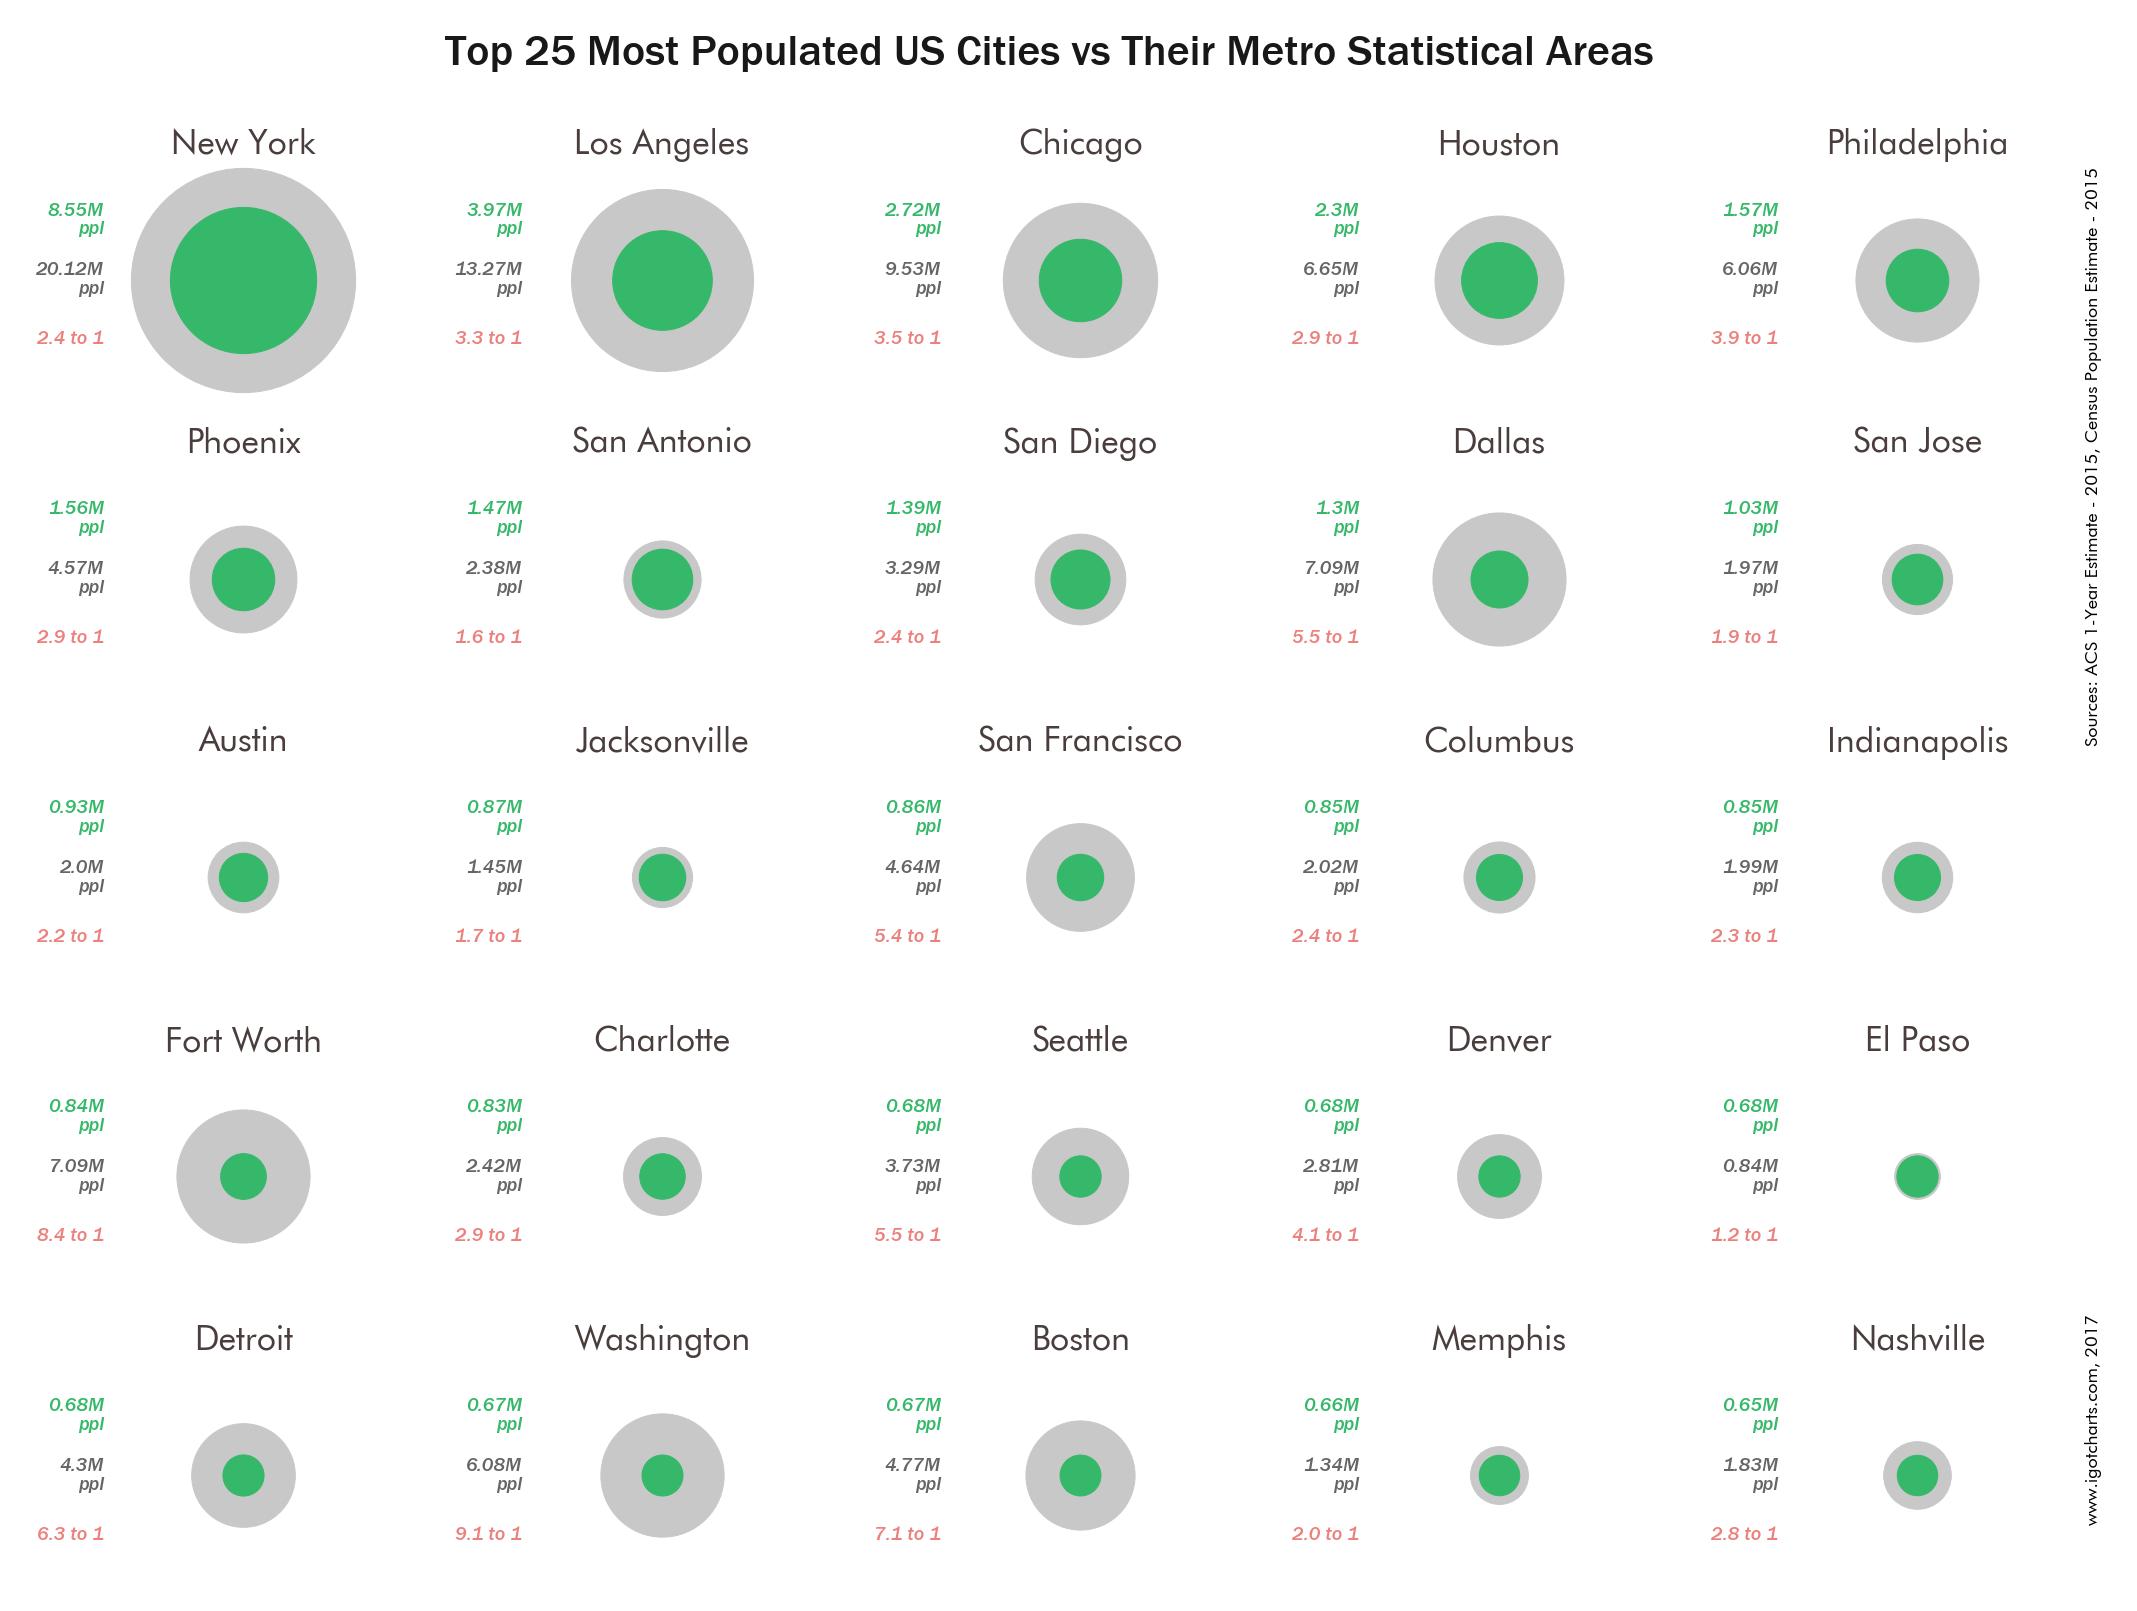

In [137]:
os.chdir(outputs)
population_bubbles(population)
plt.savefig('Population Comparison',bbox_inches = 'tight', dpi = 300, pad_inches = .5,transparent=False)
plt.show()

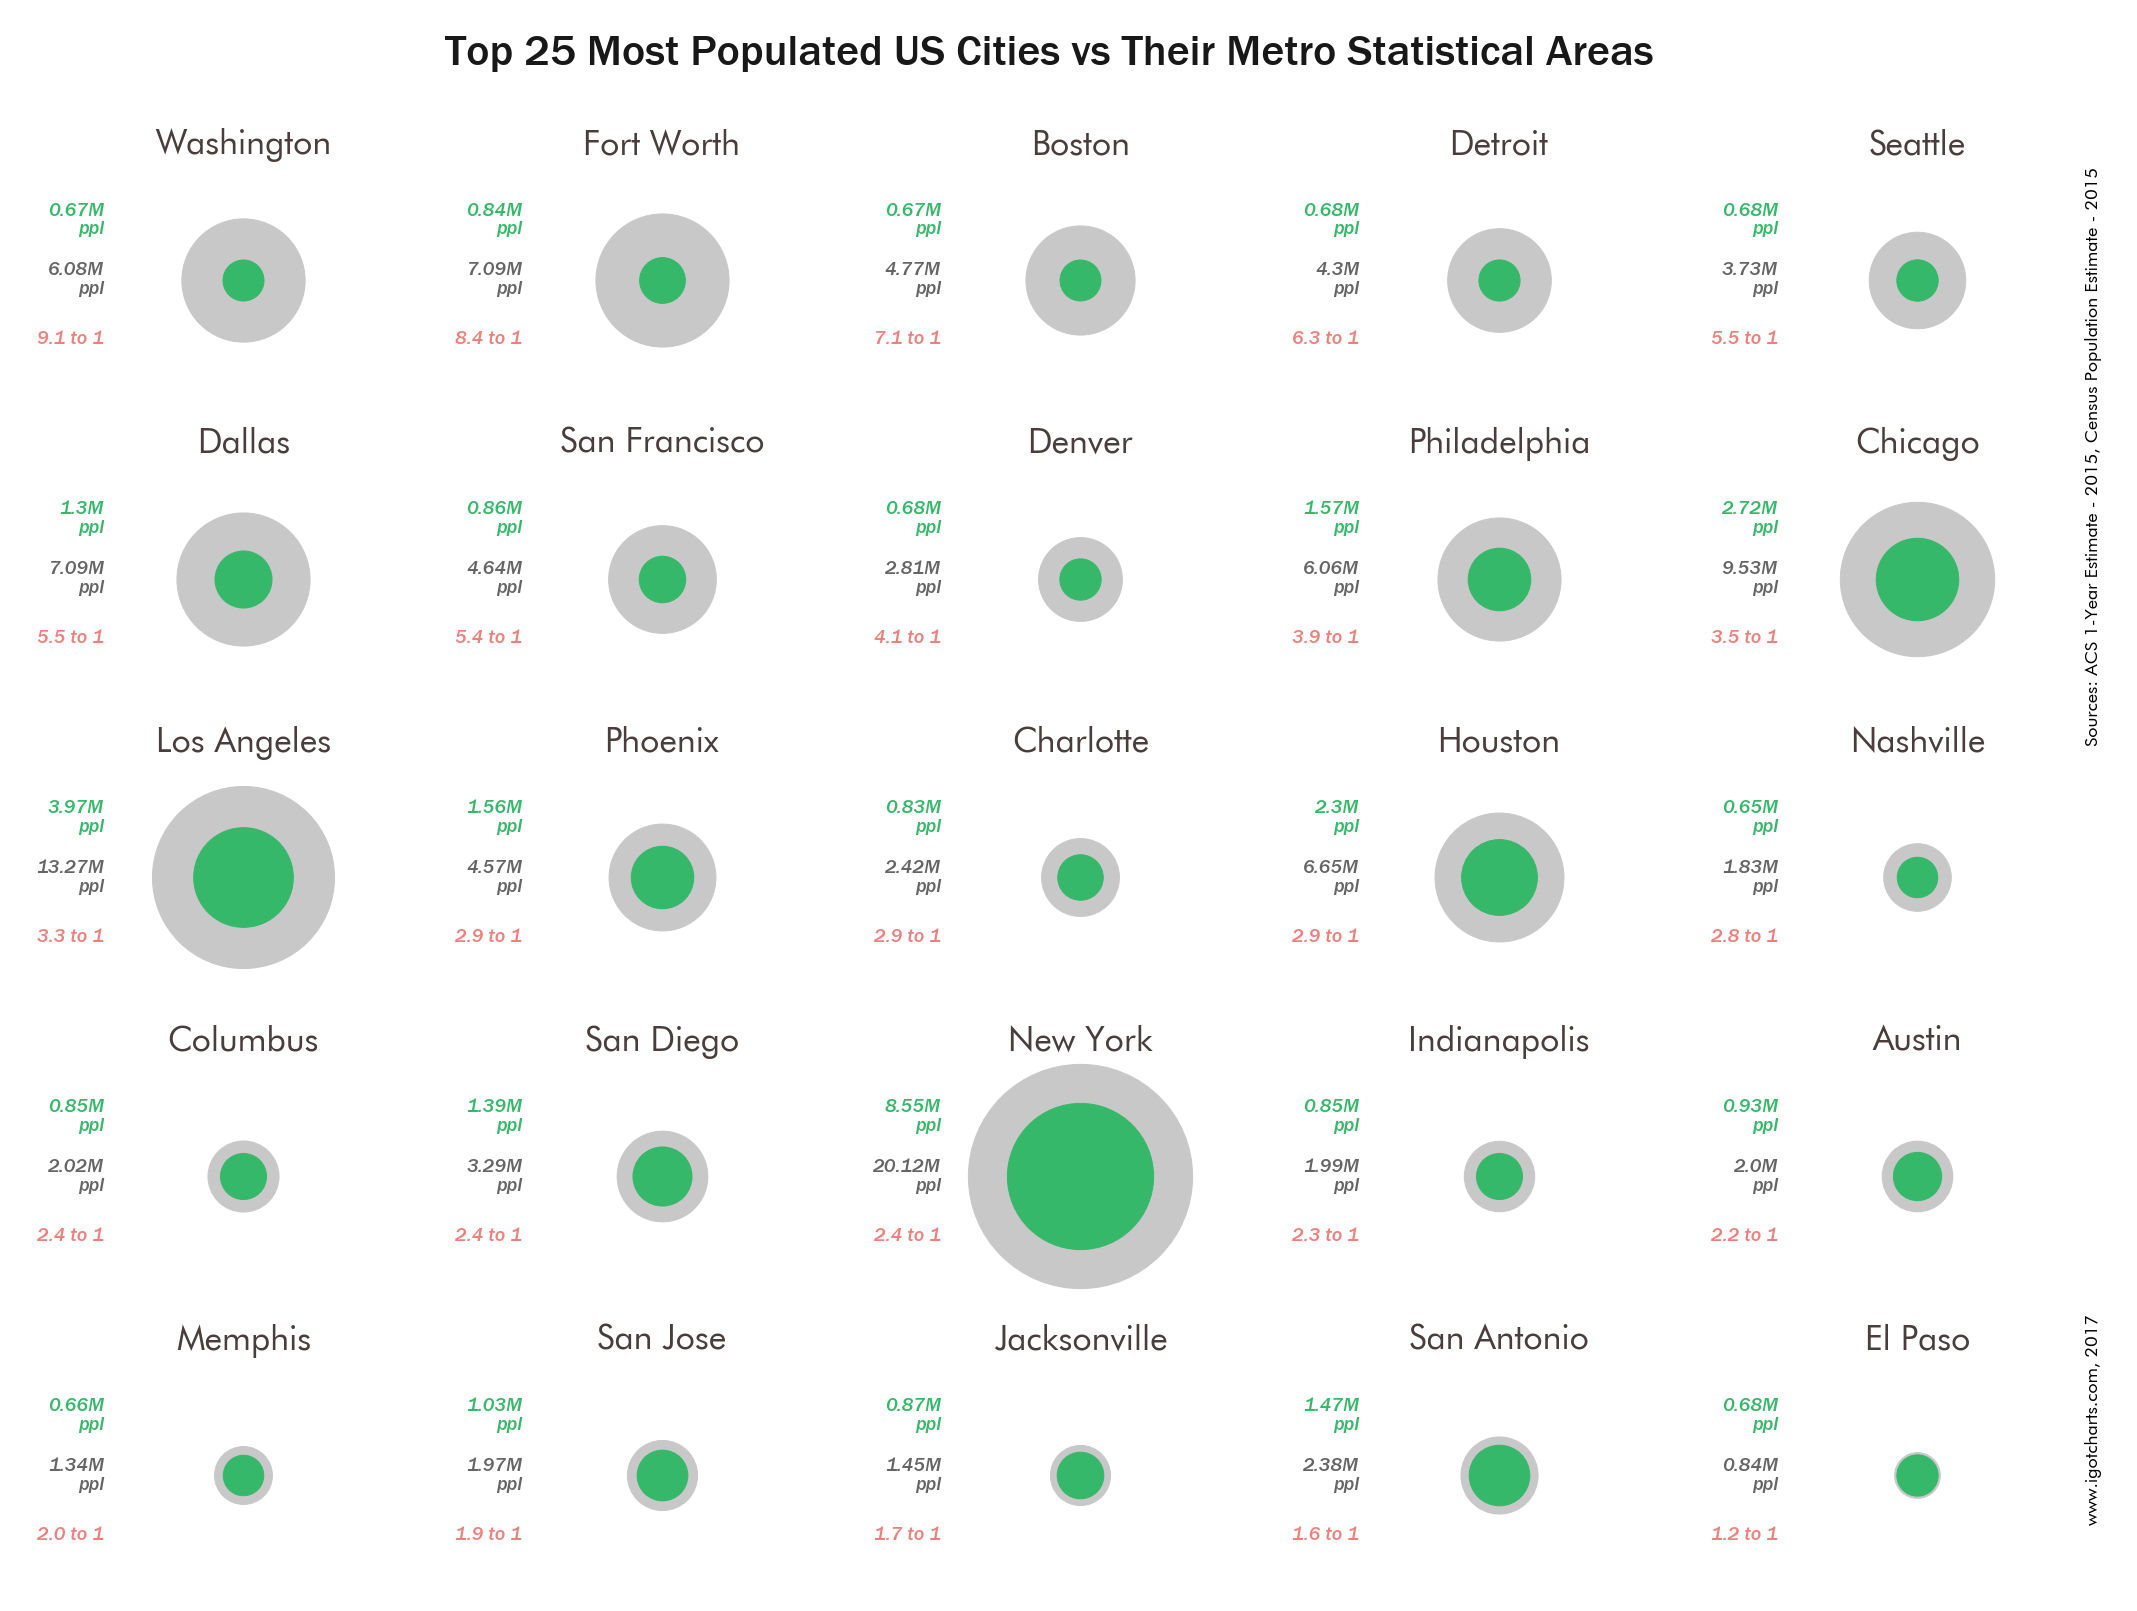

In [141]:
population_bubbles(population_25_metro_diff)
plt.savefig('Population Comparison_ratio_sort',bbox_inches = 'tight', dpi = 300, pad_inches = .5,transparent=False)
plt.show()